In [45]:
import pandas as pd

from fitter import Fitter, get_common_distributions, get_distributions

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
psid = pd.read_csv('../data/external/PanelStudyIncomeDynamics.csv')

In [13]:
psid.head()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
0,1152,24,1981,1,3505,0.0,1.0,17.000,10,34,...,0,0,1,0,0,0,0,0,1,0
1,5057,171,1981,1,675,0.0,2.0,2.000,10,32,...,0,0,0,0,0,0,1,0,1,1
2,6375,170,2009,1,8505,0.0,1.0,6.565,10,64,...,0,0,0,0,0,0,1,0,1,1
3,2261,3,1999,1,4202,0.0,2.0,25.973,10,50,...,0,0,0,0,0,0,0,1,1,1
4,5927,7,1990,1,605,0.0,3.0,14.819,10,26,...,0,0,0,0,0,0,1,0,1,1


In [18]:
psid.shape

(33398, 274)

In [19]:
psid.describe()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
count,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33395.000000,33398.000000,33398.000000,33398.000000,...,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33398.000000,33398.0,33398.000000
mean,2942.203964,75.144260,2000.293221,1.513863,3935.475058,104.879544,2.592155,18.593345,13.499132,40.467872,...,0.056620,0.034403,0.079616,0.163363,0.005659,0.080544,0.097880,0.071771,1.0,0.715103
std,2198.106202,81.071224,10.536950,0.499815,2267.144304,2662.001098,0.929496,14.428494,4.835112,10.401476,...,0.231119,0.182265,0.270701,0.369702,0.075014,0.272137,0.297157,0.258112,0.0,0.451372
min,4.000000,1.000000,1981.000000,1.000000,1.000000,-5000.000000,1.000000,0.000000,10.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1152.000000,4.000000,1990.000000,1.000000,2034.000000,0.000000,2.000000,5.209500,10.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,2210.000000,30.000000,2007.000000,2.000000,3854.500000,0.000000,3.000000,17.184999,10.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
75%,5464.000000,172.000000,2009.000000,2.000000,5732.750000,0.000000,3.000000,27.212249,20.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
max,6872.000000,262.000000,2011.000000,2.000000,8940.000000,200000.000000,4.000000,167.679001,22.000000,64.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [20]:
psid.columns

Index(['intnum68', 'pernum68', 'wave', 'sex', 'intnum', 'farminc', 'region',
       'famwgt', 'relhead', 'age',
       ...
       'foodcare', 'building', 'sales', 'officeadmin', 'farmer',
       'constructextractinstall', 'production', 'transport', 'sumocc', 'LEHS'],
      dtype='object', length=274)

In [22]:
income_cols = ['farminc','annlabinc','labincbus']
psid[income_cols].describe()

,farminc,annlabinc,labincbus
count,33398.000000,3.339800e+04,33398.000000
mean,104.879544,3.708689e+04,168.051859
std,2662.001098,4.156487e+04,2257.977695
min,-5000.000000,3.000000e+01,0.000000
25%,0.000000,1.600000e+04,0.000000
50%,0.000000,2.900000e+04,0.000000
75%,0.000000,4.600000e+04,0.000000
max,200000.000000,1.500000e+06,99999.000000


In [28]:
psid[psid['farminc'] != 0][income_cols].describe()

,farminc,annlabinc,labincbus
count,120.000000,120.000000,120.000000
mean,29189.725000,24491.858333,114.133333
std,33654.453819,18135.461596,933.531183
min,-5000.000000,400.000000,0.000000
25%,7000.000000,10748.750000,0.000000
50%,20000.000000,21000.000000,0.000000
75%,40250.000000,33325.000000,0.000000
max,200000.000000,101400.000000,10000.000000


In [27]:
psid[psid.annlabinc > 0][income_cols].describe()

,farminc,annlabinc,labincbus
count,33398.000000,3.339800e+04,33398.000000
mean,104.879544,3.708689e+04,168.051859
std,2662.001098,4.156487e+04,2257.977695
min,-5000.000000,3.000000e+01,0.000000
25%,0.000000,1.600000e+04,0.000000
50%,0.000000,2.900000e+04,0.000000
75%,0.000000,4.600000e+04,0.000000
max,200000.000000,1.500000e+06,99999.000000


In [33]:
category_cols = ['sex','region','white', 'black','hisp', 'age']

In [34]:
psid[category_cols].isnull().sum()

sex       0
region    3
white     0
black     0
hisp      0
age       0
dtype: int64

,sumsquare_error,aic,bic,kl_div
norm,2.396454e-10,4.258717e+04,-1.087689e+06,inf
lognorm,7.046555e-10,3.425914e+03,-1.051657e+06,inf
exponential,inf,inf,inf,inf


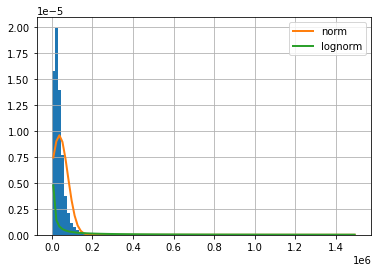

In [47]:
f = Fitter(psid.annlabinc,
           distributions=['lognorm',
                          "norm"])
f.fit()
f.summary()

In [48]:
q_9 = psid.annlabinc.quantile(0.9)
q_9

70000.0

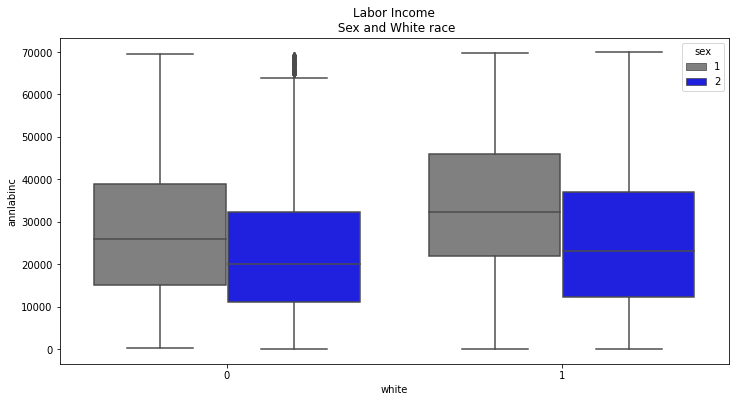

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(title="Labor Income\n Sex and White race")
ax = sns.boxplot(x="white", y="annlabinc", hue="sex",
                 data=psid[psid.annlabinc < q_9], 
                 dodge=True, ax = ax, palette=['gray','blue'])